In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Show all columns
pd.set_option('display.max_columns', None)

## Teams

- yearID         Year
- lgID           League
- teamID         Team
- franchID       Franchise (links to TeamsFranchise table)
- divID          Team's division
- Rank           Position in final standings
- G              Games played
- GHome          Games played at home
- W              Wins
- L              Losses
- DivWin         Division Winner (Y or N)
- WCWin          Wild Card Winner (Y or N)
- LgWin          League Champion(Y or N)
- WSWin          World Series Winner (Y or N)
- R              Runs scored
- AB             At bats
- H              Hits by batters
- 2B             Doubles
- 3B             Triples
- HR             Homeruns by batters
- BB             Walks by batters
- SO             Strikeouts by batters
- SB             Stolen bases
- CS             Caught stealing
- HBP            Batters hit by pitch
- SF             Sacrifice flies
- RA             Opponents runs scored
- ER             Earned runs allowed
- ERA            Earned run average
- CG             Complete games
- SHO            Shutouts
- SV             Saves
- IPOuts         Outs Pitched (innings pitched x 3)
- HA             Hits allowed
- HRA            Homeruns allowed
- BBA            Walks allowed
- SOA            Strikeouts by pitchers
- E              Errors
- DP             Double Plays
- FP             Fielding  percentage
- name           Team's full name
- park           Name of team's home ballpark
- attendance     Home attendance total
- BPF            Three-year park factor for batters
- PPF            Three-year park factor for pitchers
- teamIDBR       Team ID used by Baseball Reference website
- teamIDlahman45 Team ID used in Lahman database version 4.5
- teamIDretro    Team ID used by Retrosheet

In [183]:
# Read in the data
teams = pd.read_csv('data/Teams.csv')
# Import data for war
player = pd.read_csv('data/player_stats_2.csv')

In [184]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60.0,19.0,73.0,16.0,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,243,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60.0,22.0,69.0,21.0,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,229,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26.0,25.0,18.0,8.0,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,234,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33.0,9.0,16.0,4.0,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33.0,15.0,46.0,15.0,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,235,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [185]:
player.head()

,name_x,age,playerID,yearID,teamID,br_WAR_bat,br_WAR_pit,br_WAR_total,leagueID,divID_x,Rank_x,G_x,Ghome_x,W_x,L_x,DivWin_x,WCWin_x,LgWin_x,WSWin_x,R_x,AB_x,H_x,2B_x,3B_x,HR_x,BB_x,SO_x,SB_x,CS_x,HBP_x,SF_x,RA_x,ER_x,ERA_x,CG_x,SHO_x,SV_x,IPouts_x,HA_x,HRA_x,BBA_x,SOA_x,E_x,DP_x,FP_x,name_y_x,park_x,attendance_x,BPF_x,PPF_x,teamIDBR_x,teamIDlahman45_x,teamIDretro_x,fg_WAR_bat,fg_WAR_pit,fg_WAR_total,divID_y,Rank_y,G_y,Ghome_y,W_y,L_y,DivWin_y,WCWin_y,LgWin_y,WSWin_y,R_y,AB_y,H_y,2B_y,3B_y,HR_y,BB_y,SO_y,SB_y,CS_y,HBP_y,SF_y,RA_y,ER_y,ERA_y,CG_y,SHO_y,SV_y,IPouts_y,HA_y,HRA_y,BBA_y,SOA_y,E_y,DP_y,FP_y,name_y_y,park_y,attendance_y,BPF_y,PPF_y,teamIDBR_y,teamIDlahman45_y,teamIDretro_y,nameFirst,nameLast,weight,height,bats,throws,debut,awardID,lgID,stint_BAT,lgID_BAT,games_BAT,at_bats_BAT,runs_BAT,hits_BAT,doubles_BAT,triples_BAT,home_runs_BAT,runs_batted_in_BAT,stolen_bases_BAT,caught_stealing_BAT,walks_BAT,strikeouts_BAT,intentional_walks_BAT,hit_by_pitch_BAT,sacrifice_hits_BAT,sacrifice_flies_BAT,grounded_into_double_play_BAT,stint_PIT,lgID_PIT,wins_PIT,losses_PIT,games_PIT,games_started_PIT,complete_games_PIT,shutouts_PIT,saves_PIT,outs_pitched_PIT,hits_allowed_PIT,earned_runs_PIT,home_runs_allowed_PIT,walks_PIT,strikeouts_PIT,opponent_batting_average_PIT,earned_run_average_PIT,intentional_walks_PIT,wild_pitches_PIT,hit_by_pitch_PIT,balks_PIT,batters_faced_PIT,games_finished_PIT,runs_allowed_PIT,sacrifice_hits_PIT,sacrifice_flies_PIT,grounded_into_double_play_PIT,salary
0,David Aardsma,22.0,aardsda01,2004,SFG,0.00,-0.15,-0.15,NL,W,2,162,82.0,91,71,N,N,N,N,850,5546,1500,314,33,183,705.0,874.0,43.0,23.0,72.0,51.0,770,695,4.29,8,8,46,4371,1481,161,548,1020,101,153,0.984,San Francisco Giants,SBC Park,3256854.0,101,101,SFG,SFN,SFN,0.0,-0.3,-0.3,W,2,162,82.0,91,71,N,N,N,N,850,5546,1500,314,33,183,705.0,874.0,43.0,23.0,72.0,51.0,770,695,4.29,8,8,46,4371,1481,161,548,1020,101,153,0.984,San Francisco Giants,SBC Park,3256854.0,101,101,SFG,SFN,SFN,David,Aardsma,215.0,75.0,R,R,2004-04-06,NaN,NaN,1.0,NL,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NL,1.0,0.0,11.0,0.0,0.0,0.0,0.0,32.0,20.0,8.0,1.0,10.0,5.0,0.417,6.75,0.0,0.0,2.0,0.0,61.0,5.0,8.0,0.0,1.0,1.0,300000.0
1,Edgardo Alfonzo,30.0,alfoned01,2004,SFG,0.55,NaN,NaN,NL,W,2,162,82.0,91,71,N,N,N,N,850,5546,1500,314,33,183,705.0,874.0,43.0,23.0,72.0,51.0,770,695,4.29,8,8,46,4371,1481,161,548,1020,101,153,0.984,San Francisco Giants,SBC Park,3256854.0,101,101,SFG,SFN,SFN,1.4,NaN,1.4,W,2,162,82.0,91,71,N,N,N,N,850,5546,1500,314,33,183,705.0,874.0,43.0,23.0,72.0,51.0,770,695,4.29,8,8,46,4371,1481,161,548,1020,101,153,0.984,San Francisco Giants,SBC Park,3256854.0,101,101,SFG,SFN,SFN,Edgardo,Alfonzo,210.0,71.0,R,R,1995-04-26,NaN,NaN,1.0,NL,139.0,519.0,66.0,150.0,26.0,1.0,11.0,77.0,1.0,1.0,46.0,40.0,2.0,5.0,2.0,4.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6500000.0
2,Barry Bonds,39.0,bondsba01,2004,SFG,10.64,NaN,NaN,NL,W,2,162,82.0,91,71,N,N,N,N,850,5546,1500,314,33,183,705.0,874.0,43.0,23.0,72.0,51.0,770,695,4.29,8,8,46,4371,1481,161,548,1020,101,153,0.984,San Francisco Giants,SBC Park,3256854.0,101,101,SFG,SFN,SFN,11.9,NaN,11.9,W,2,162,82.0,91,71,N,N,N,N,850,5546,1500,314,33,183,705.0,874.0,43.0,23.0,72.0,51.0,770,695,4.29,8,8,46,4371,1481,161,548,1020,101,153,0.984,San Francisco Giants,SBC Park,3256854.0,101,101,SFG,SFN,SFN,Barry,Bonds,185.0,73.0,L,L,1986-05-30,Hank Aaron Award,NL,1.0,NL,147.0,373.0,129.0,135.0,27.0,3.0,45.0,101.0,6.0,1.0,232.0,41.0,120.0,9.0,0.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000000.0
3,Barry Bonds,39.0,bondsba01,2004,SFG,10.64,NaN,NaN,NL,W,2,162,82.0,91,71,N,N,N,N,850,5546,1500,314,33,183,705.0,874.0,43.0,23.0,72.0,51.0,770,695,4.29,8,8,46,4371,1481,161,548,1020,101,153,0.984,San Francisco Giants,SBC Park,3256854.0,101,101,SFG,SFN,SFN,11.9,NaN,11.9,W,2,162,82.0,91,71,N,N,N,N,850,5546,1500,314

In [186]:
def agg_player_to_team_stats(teams, player, cols):
    """
    Creates a new dataframe with the an aggregated WAR score for each team for each year

    Parameters
    ----------
    teams : DataFrame
        DataFrame containing the team information per year
    player : DataFrame
        DataFrame containing the player information such as WAR, salary, height etc.
    cols : list
        List of columns to aggregate in the player dataframe

    Returns
    -------
    DataFrame
        DataFrame containing the aggregated WAR score for each team for each year
    """
    # Filter out by NL
    teams = teams[teams["lgID"] == "NL"]
    # Team columns to keep
    team_cols = ["yearID","teamID", "Rank"]
    teams = teams[team_cols]
    
    # Group by team and year and aggregate the cols by mean and ignore the NA values
    team_id_merge = player.groupby(["yearID", "teamID"])[cols].mean().reset_index()

    # Merge teams and team_id_merge
    team_war = pd.merge(teams, team_id_merge, on=["yearID", "teamID"], how="left")

    # Filter out the years before 1985
    team_war = team_war[team_war["yearID"] >= 1985]

    return team_war


cols = ["br_WAR_total", "fg_WAR_total"]
team_war = agg_player_to_team_stats(teams, player, cols)
team_war.head()

,yearID,teamID,franchID,Rank,br_WAR_total,fg_WAR_total
0,1876,BSN,ATL,4,NaN,NaN
1,1876,CHN,CHC,1,NaN,NaN
2,1876,CN1,CNR,8,NaN,NaN
3,1876,HAR,HAR,2,6.965,1.881818
4,1876,LS1,LGR,5,NaN,NaN


In [180]:
# Team_war in 1876
hej = team_war[(team_war["yearID"] == 2000)]
hej.head(16)


,yearID,teamID,franchID,Rank,br_WAR_total,fg_WAR_total
1176,2000,ARI,ARI,3,1.016250,1.121875
1177,2000,ATL,ATL,1,1.545789,1.707895
1178,2000,CHN,CHC,6,NaN,NaN
1179,2000,CIN,CIN,2,0.997714,1.014286
1180,2000,COL,COL,4,1.543438,1.287500
1181,2000,FLO,FLA,3,NaN,NaN
1182,2000,HOU,HOU,4,0.690000,0.852500
1183,2000,LAN,LAD,2,NaN,NaN
1184,2000,MIL,MIL,3,0.603611,0.508333
1185,2000,MON,WSN,4,0.486829,0.621951


In [182]:
# Show 
hep = player[(player["yearID"] == 2000) & (player["teamID"] == "CHN") ]
hep.head(20)

,name,age,playerID,yearID,teamID,br_WAR_bat,br_WAR_pit,br_WAR_total,leagueID,fg_WAR_bat,fg_WAR_pit,fg_WAR_total,nameFirst,nameLast,weight,height,bats,throws,debut,awardID,lgID,stint_BAT,lgID_BAT,games_BAT,at_bats_BAT,runs_BAT,hits_BAT,doubles_BAT,triples_BAT,home_runs_BAT,runs_batted_in_BAT,stolen_bases_BAT,caught_stealing_BAT,walks_BAT,strikeouts_BAT,intentional_walks_BAT,hit_by_pitch_BAT,sacrifice_hits_BAT,sacrifice_flies_BAT,grounded_into_double_play_BAT,stint_PIT,lgID_PIT,wins_PIT,losses_PIT,games_PIT,games_started_PIT,complete_games_PIT,shutouts_PIT,saves_PIT,outs_pitched_PIT,hits_allowed_PIT,earned_runs_PIT,home_runs_allowed_PIT,walks_PIT,strikeouts_PIT,opponent_batting_average_PIT,earned_run_average_PIT,intentional_walks_PIT,wild_pitches_PIT,hit_by_pitch_PIT,balks_PIT,batters_faced_PIT,games_finished_PIT,runs_allowed_PIT,sacrifice_hits_PIT,sacrifice_flies_PIT,grounded_into_double_play_PIT,salary


In [118]:
# hep with teamID = CHN
h = hep[hep["teamID"] == "CHN"]
h.head()

,name,age,playerID,yearID,teamID,WAR_bat,WAR_pit,WAR_total


In [135]:
# Show 
hep = player[(player["yearID"] == 2000) & (player["teamID"] == "MON") ]
hep.head(20)

,name,age,playerID,yearID,teamID,WAR_bat,WAR_pit,WAR_total
2958,Tony Armas,22.0,armasto02,2000,MON,-0.14,1.77,1.63
5377,Michael Barrett,23.0,barremi01,2000,MON,-1.99,NaN,NaN
5763,Miguel Batista,29.0,batismi01,2000,MON,0.02,-0.75,-0.73
7711,Peter Bergeron,22.0,bergepe01,2000,MON,-0.97,NaN,NaN
9108,Matt Blank,24.0,blankma01,2000,MON,-0.02,0.16,0.14
9418,Geoff Blum,27.0,blumge01,2000,MON,0.86,NaN,NaN
11172,Milton Bradley,22.0,bradlmi01,2000,MON,-0.87,NaN,NaN
15378,Orlando Cabrera,25.0,cabreor01,2000,MON,-0.92,NaN,NaN
21956,Trace Coquillette,26.0,coquitr01,2000,MON,-0.27,NaN,NaN
26347,Tomas de la Rosa,22.0,delarto01,2000,MON,0.21,NaN,NaN


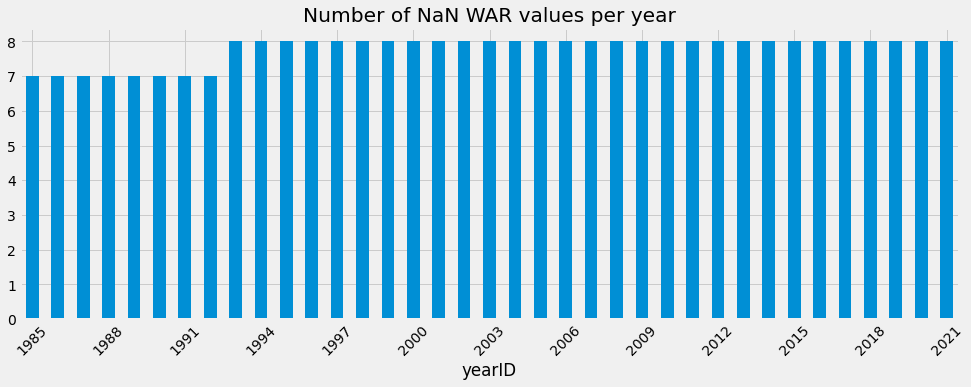

In [160]:
# Plot number of NaN WAR values per year
team_war.groupby("yearID")["br_WAR_total"].apply(lambda x: x.isna().sum()).plot(kind="bar", figsize=(15,5))
plt.title("Number of NaN WAR values per year")
# Set style to fivethirtyeight
plt.style.use('fivethirtyeight')
# Make x-axis readable
plt.xticks(rotation=45)
# Show only 15 x-ticks
plt.locator_params(axis='x', nbins=15)
plt.show()

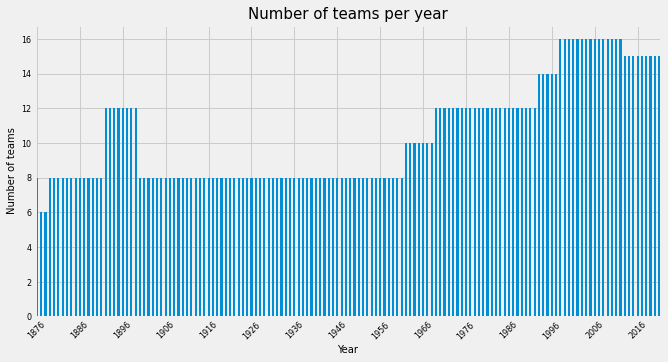

In [71]:
### Plot the number of teams per year ###
# Set plot size
plt.figure(figsize=(10,5))
# Plot value_counts(yearID) as a bar plot and sort by yearID
team_war.value_counts("yearID").sort_index().plot(kind="bar")
# Set style to fivethirtyeight
plt.style.use('fivethirtyeight')
# Make x-axis readable
plt.xticks(rotation=45)
# Show only 15 x-ticks
plt.locator_params(axis='x', nbins=15)
# Add a title
plt.title("Number of teams per year", fontsize=15)
# Add y-label
plt.ylabel("Number of teams", fontsize=10)
# Add x-label
plt.xlabel("Year", fontsize=10)
# x-axis ticks fontsize
plt.xticks(fontsize=8)
# y-axis ticks fontsize
plt.yticks(fontsize=8)
# Show the plot
#plt.show()

# Write the plot to a file
plt.savefig("viz/number_of_teams_per_year.png")